In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
'''
FONTOS: Az első feladatáltal visszaadott DataFrame-et kell használni a további feladatokhoz. 
A függvényeken belül mindig készíts egy másolatot a bemenő df-ről, (new_df = df.copy() és ezzel dolgozz tovább.)
'''

In [ ]:
'''
Készíts egy függvényt, ami egy string útvonalat vár paraméterként, és egy DataFrame ad visszatérési értékként.

Egy példa a bemenetre: 'test_data.csv'
Egy példa a kimenetre: df_data
return type: pandas.core.frame.DataFrame
függvény neve: csv_to_df
'''

In [3]:
def csv_to_df(test_data:str) -> pd.core.frame.DataFrame:
    return pd.read_csv(test_data)

#df = csv_to_df('StudentsPerformance.csv')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
'''
Készíts egy függvényt, ami egy DataFrame-et vár paraméterként, 
és átalakítja azoknak az oszlopoknak a nevét nagybetűsre amelyiknek neve nem tartalmaz 'e' betüt.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_capitalized
return type: pandas.core.frame.DataFrame
függvény neve: capitalize_columns
'''

In [11]:
def capitalize_columns(df_data) -> pd.core.frame.DataFrame:
    df_copy = df_data.copy()
    for col in df_copy.columns:
        if 'e' not in col:
            df_copy = df_copy.rename(columns={col: col.upper()})
    return df_copy

,gender,race/ethnicity,parental level of education,LUNCH,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
'''
Készíts egy függvényt, ahol egy szám formájában vissza adjuk, hogy hány darab diáknak sikerült teljesíteni a matek vizsgát.
(legyen az átmenő ponthatár 50).

Egy példa a bemenetre: df_data
Egy példa a kimenetre: 5
return type: int
függvény neve: math_passed_count
'''

In [19]:
def math_passed_count(df_data) -> int:
    df_copy = df_data.copy()
    return len(df_copy[df_copy['math score'] >= 50])

865

In [ ]:
'''
Készíts egy függvényt, ahol Dataframe ként vissza adjuk azoknak a diákoknak az adatait (sorokat), akik végeztek előzetes gyakorló kurzust.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_did_pre_course
return type: pandas.core.frame.DataFrame
függvény neve: did_pre_course
'''

In [20]:
def did_pre_course(df_data) -> pd.core.frame.DataFrame:
    df_copy = df_data.copy()
    return df_copy[df_copy['test preparation course'] == 'completed']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [ ]:
'''
Készíts egy függvényt, ahol a bemeneti Dataframet a diákok szülei végzettségi szintjei alapján csoportosításra kerül,
majd aggregációként vegyük, hogy átlagosan milyen pontszámot értek el a diákok a vizsgákon.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_average_scores
return type: pandas.core.frame.DataFrame
függvény neve: average_scores
'''

In [25]:
def average_scores(df_data) -> pd.core.frame.DataFrame:
    df_copy = df_data.copy()
    return df_copy.groupby('parental level of education')['math score', 'reading score', 'writing score'].mean()

C:\Users\pekar\AppData\Local\Temp\ipykernel_17184\1033690207.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  return df_copy.groupby('parental level of education')['math score', 'reading score', 'writing score'].mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'age' oszloppal, töltsük fel random 18-66 év közötti értékekkel.
A random.randint() függvényt használd, a random sorsolás legyen seedleve, ennek értéke legyen 42.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_age
return type: pandas.core.frame.DataFrame
függvény neve: add_age
'''

In [136]:
def add_age(df_data) -> pd.core.frame.DataFrame:
    df_copy = df_data.copy()
    random.seed(42)
    df_copy['age'] = (random.randint(18, 66))
    return df_copy

age
58    66.089
Name: math score, dtype: float64

In [ ]:
'''
Készíts egy függvényt, ami vissza adja a legjobb teljesítményt elérő női diák pontszámait.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: (99,99,99) #math score, reading score, writing score
return type: tuple
függvény neve: female_top_score
'''

In [145]:
def female_top_score(df_data) -> tuple:
    df_copy = df_data.copy()
    fem = df_copy.loc[np.where(df_copy['gender'] == 'female') and max(df_copy['math score'] + df_copy['reading score'] + df_copy['writing score'])]
    return (fem['math score'], fem['reading score'], fem['writing score'])

(81, 78, 81)

In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'grade' oszloppal. 
Számoljuk ki hogy a diákok hány százalékot ((math+reading+writing)/300) értek el a vizsgán, és osztályozzuk őket az alábbi szempontok szerint:

90-100%: A
80-90%: B
70-80%: C
60-70%: D
<60%: F

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_grade
return type: pandas.core.frame.DataFrame
függvény neve: add_grade
'''

In [146]:
def add_grade(df_data) ->pd.core.frame.DataFrame:
    df_copy = df_data.copy() 
    df_copy['grade'] = ''
    for i in range(len(df_copy)):
        if (df_copy['math score'][i] + df_copy['reading score'][i] + df_copy['writing score'][i]) / 300 >= 0.9:
            df_copy['grade'] = 'A'
        elif (df_copy['math score'][i] + df_copy['reading score'][i] + df_copy['writing score'][i]) / 300 >= 0.8:
            df_copy['grade'] = 'B'
        elif (df_copy['math score'][i] + df_copy['reading score'][i] + df_copy['writing score'][i]) / 300 >= 0.7:
            df_copy['grade'] = 'C'
        elif (df_copy['math score'][i] + df_copy['reading score'][i] + df_copy['writing score'][i]) / 300 >= 0.6:
            df_copy['grade'] = 'D'
        else:
            df_copy['grade'] = 'E'
    return df_copy

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,B
1,female,group C,some college,standard,completed,69,90,88,B
2,female,group B,master's degree,standard,none,90,95,93,B
3,male,group A,associate's degree,free/reduced,none,47,57,44,B
4,male,group C,some college,standard,none,76,78,75,B
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,B
996,male,group C,high school,free/reduced,none,62,55,55,B
997,female,group C,high school,free/reduced,completed,59,71,65,B
998,female,group D,some college,standard,completed,68,78,77,B


In [ ]:
'''
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan oszlop diagrammot,
ami vizualizálja a nemek által elért átlagos matek pontszámot.

Oszlopdiagram címe legyen: 'Average Math Score by Gender'
Az x tengely címe legyen: 'Gender'
Az y tengely címe legyen: 'Math Score'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: math_bar_plot
'''

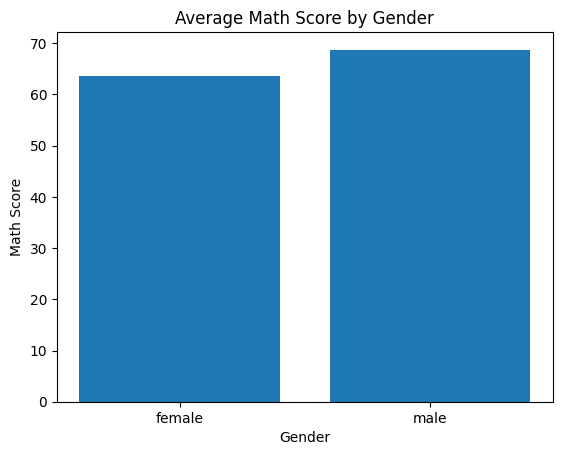

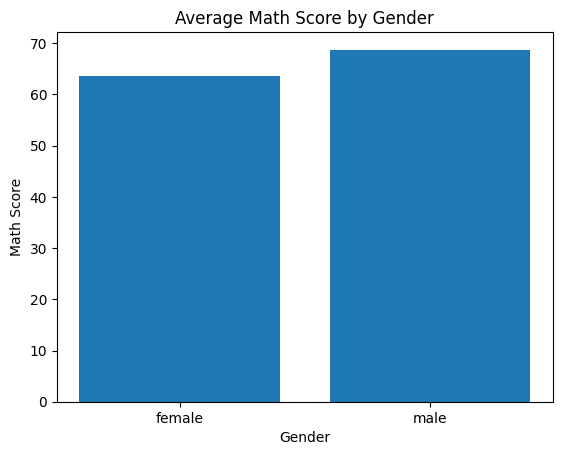

In [158]:
def math_bar_plot(df_data) -> plt.figure:
    df_copy = df_data.copy()
    gender_group = df_copy.groupby('gender')['math score'].mean()
    fig, ax = plt.subplots()
    ax.bar(gender_group.index, gender_group.values)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Math Score')
    ax.set_title('Average Math Score by Gender')
    return fig

math_bar_plot(df)

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,
ami vizualizálja az elért írásbeli pontszámokat.

A histogram címe legyen: 'Distribution of Writing Scores'
Az x tengely címe legyen: 'Writing Score'
Az y tengely címe legyen: 'Number of Students'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: writing_hist
'''

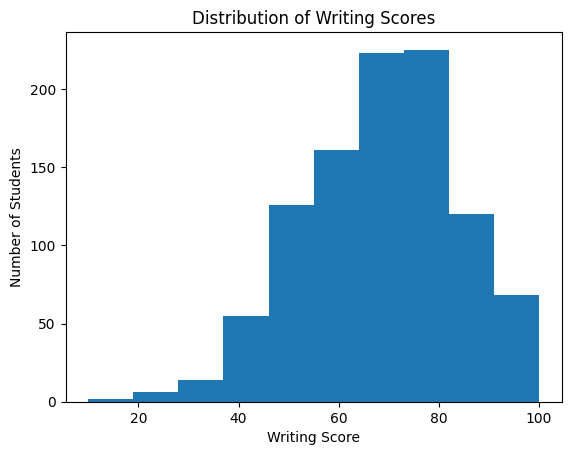

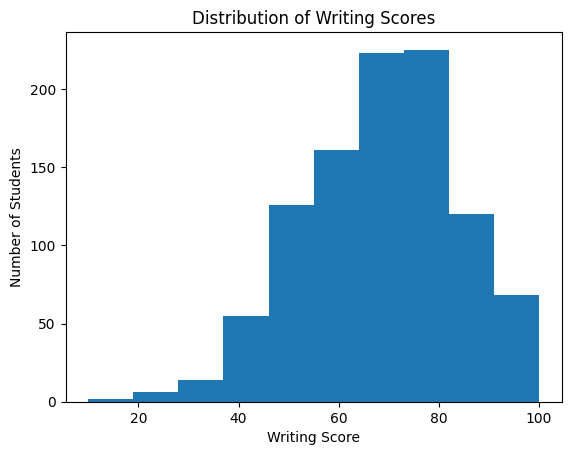

In [160]:
def writing_hist(df_data):
    df_copy = df_data.copy()
    fig, ax = plt.subplots()
    ax.hist(df_copy['writing score'])
    ax.set_title('Distribution of Writing Scores')
    ax.set_xlabel('Writing Score')
    ax.set_ylabel('Number of Students')
    return fig

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan kördiagramot,
ami vizualizálja a diákok etnikum csoportok szerinti eloszlását százalékosan.

Érdemes megszámolni a diákok számát, etnikum csoportonként,majd a százalékos kirajzolást az autopct='%1.1f%%' paraméterrel megadható.
Mindegyik kör szelethez tartozzon egy címke, ami a csoport nevét tartalmazza.
A diagram címe legyen: 'Proportion of Students by Race/Ethnicity'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: ethnicity_pie_chart
'''

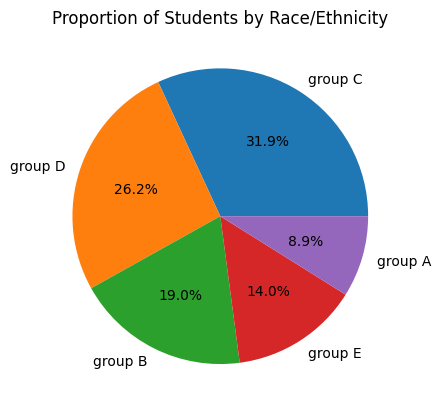

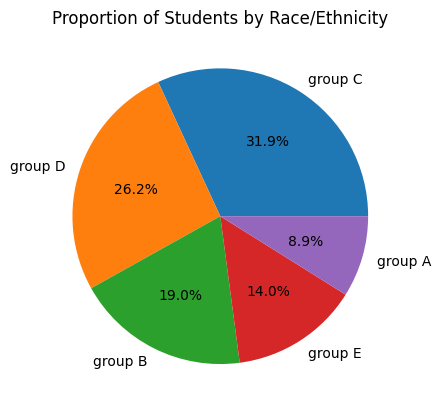

In [166]:
def ethnicity_pie_chart(df_data) -> plt.figure:
    df_copy = df_data.copy()
    ethnicity_counts = df_copy['race/ethnicity'].value_counts()
    lab = ethnicity_counts.index
    sizes = ethnicity_counts.values / df_copy.shape[0] * 100
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=lab, autopct='%1.1f%%')
    ax.set_title('Proportion of Students by Race/Ethnicity')
    return fig

ethnicity_pie_chart(df)